In [1]:
# %matplotlib notebook
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.time import Time

In [4]:
results_path = "/Users/berto/Code/MLprojects/zoidberg/ABPSoton10k/data/Results10k.csv"

df = pd.read_csv(results_path)

In [5]:
df.head()

,Pos,Bib No,Fav,Share,Print,Name,Gun Time,Chip Time,Category,Cat Pos,Gender,Gen Pos,Club,Pace,TOD,Beat the Bridge,G/Pos,Beat the Bridge.1,G/Pos.1
0,1,1163,NaN,NaN,NaN,James HUGHES,00:36:47.0,00:36:45.3,Top 3,1,Male,1,ITCHEN SPITFIRES/ EALING SOUTHALL AND MIDDLESEX,16.3 km/h,11:06:53.0,00:06:32.4,2,00:06:32.4,2
1,2,143,NaN,NaN,NaN,William BRYAN,00:36:51.7,00:36:49.1,Top 3,2,Male,2,NaN,16.3 km/h,11:06:57.7,00:06:28.6,1,00:06:28.6,1
2,3,1771,NaN,NaN,NaN,Dan SLAYFORD,00:36:57.4,00:36:28.3,Top 3,3,Male,3,FLYERS SOUTHEND,16.2 km/h,11:07:03.4,00:06:33.3,3,00:06:33.3,3
3,4,1320,NaN,NaN,NaN,David BLACKMAN,00:37:18.6,00:37:17.3,V50,1,Male,4,SOUTHAMPTON AC,16.1 km/h,11:07:24.6,00:06:41.0,5,00:06:41.0,5
4,5,1639,NaN,NaN,NaN,David REYNOLDS,00:37:24.4,00:36:50.4,Sen,1,Male,5,LORDSHILL ROADRUNNERS,16.0 km/h,11:07:30.3,00:06:42.4,6,00:06:42.4,6


In [6]:
import seaborn as sb

In [7]:
origlength = len(df)
print("Original Length = ", origlength)
# df = df.drop(df.index[len(df)-10:])
df = df.drop(df.loc[df["Gun Time"] == "DNF"].index)
newlen = len(df)
print("Dropping ", origlength - len(df), " rows that Gun Time = 'DNF'")
df = df.drop(df.loc[df["Gun Time"] == "QRY"].index)
print("Dropping ", newlen - len(df), " rows that Gun Time = 'QRY'")
newlen = len(df)
df = df.drop(df.loc[df["Beat the Bridge"] == "99:99:99"].index)
print("Dropping ", newlen - len(df), " rows that have bad 'Beat the Bridge' time")
newlen = len(df)
print("final length = ", newlen)

Original Length =  1626
Dropping  9  rows that Gun Time = 'DNF'
Dropping  1  rows that Gun Time = 'QRY'
Dropping  3  rows that have bad 'Beat the Bridge' time
final length =  1613


In [8]:
key_list = ["Gun Time", "Chip Time", "Beat the Bridge", "Beat the Bridge.1"]

for key in key_list:
    df[key+" original"] = pd.to_timedelta(df[key].map(lambda x : "0 days " + x ))
    timedelta = pd.to_timedelta(df[key].map(lambda x : "0 days " + x ))
    df[key] = timedelta.map(lambda x : x.seconds/60.)

In [9]:
df.columns

Index(['Pos', 'Bib No', 'Fav', 'Share', 'Print', 'Name', 'Gun Time',
       'Chip Time', 'Category', 'Cat Pos', 'Gender', 'Gen Pos', 'Club', 'Pace',
       'TOD', 'Beat the Bridge', 'G/Pos', 'Beat the Bridge.1', 'G/Pos.1',
       'Gun Time original', 'Chip Time original', 'Beat the Bridge original',
       'Beat the Bridge.1 original'],
      dtype='object')

In [10]:
df.Gender.describe()

count       1613
unique         2
top       Female
freq         918
Name: Gender, dtype: object

In [11]:
def gender_bool(gender):
    if gender == "Male":
        return True
    if gender == "Female":
        return False
    else:
        return np.Nan
    
def numerate(boolean):
    return int(boolean)

In [13]:
df["Gender_bool"] = df.Gender.map(gender_bool).map(numerate)

In [14]:
df["Start_delay"] = df["Gun Time"] - df["Chip Time"]

In [15]:
df["Club_bool"] = df["Club"].isin(df["Club"].dropna()).map(numerate)

In [55]:
df.to_csv("./data/CleanResults10k.csv")

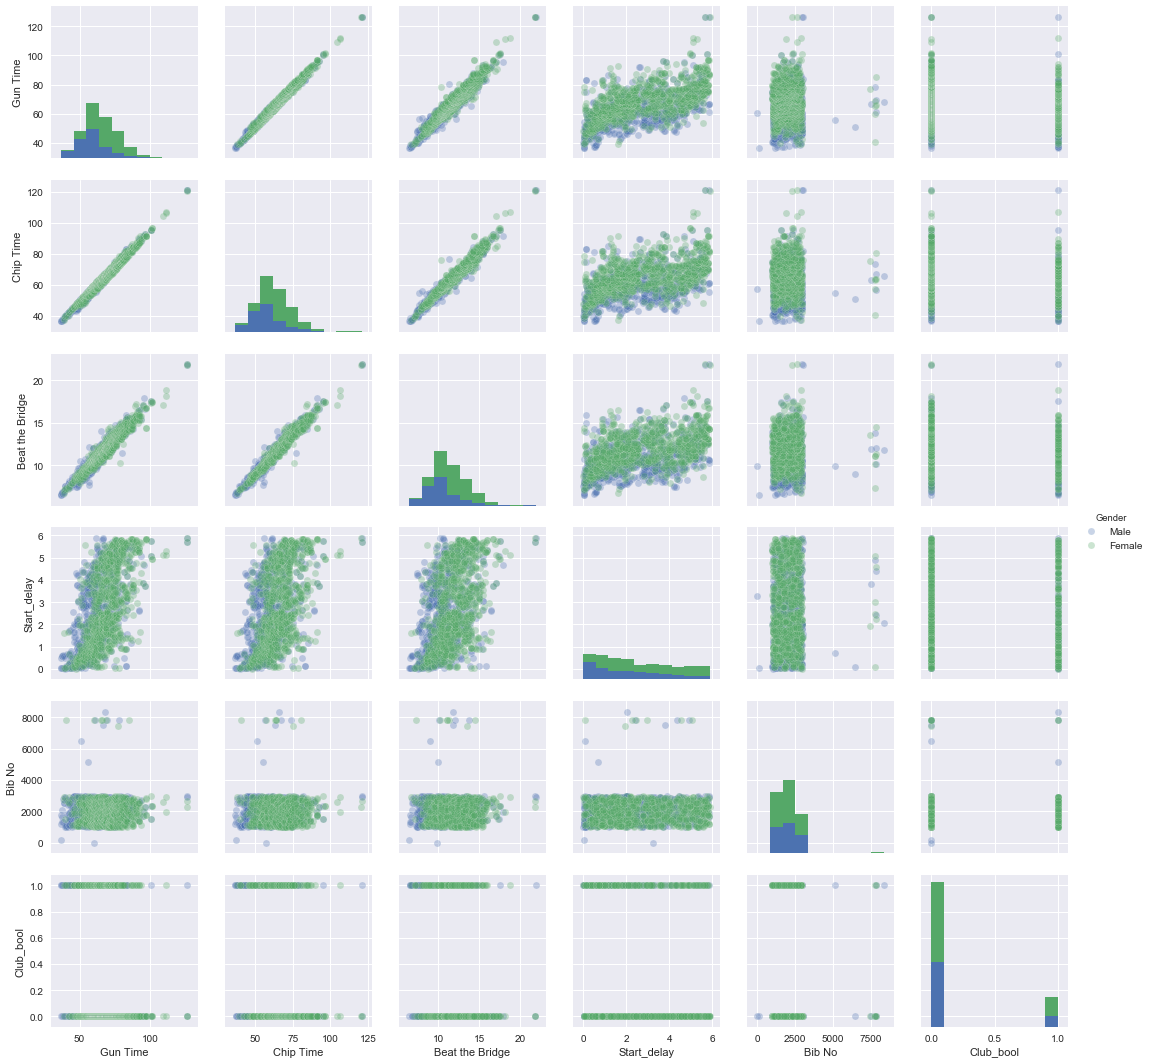

In [16]:
# key_list = ["Gun Time", "Chip Time", "Beat the Bridge", "Beat the Bridge.1", "Gender_bool"]
key_list = ["Gun Time", "Chip Time", "Beat the Bridge", "Start_delay", "Bib No", "Club_bool", "Gender"]

sb.pairplot(df[key_list], hue='Gender', plot_kws={'alpha': 0.3})
# sb.pairplot(df[key_list], hue='Gender_bool', plot_kws={'alpha': 0.3})



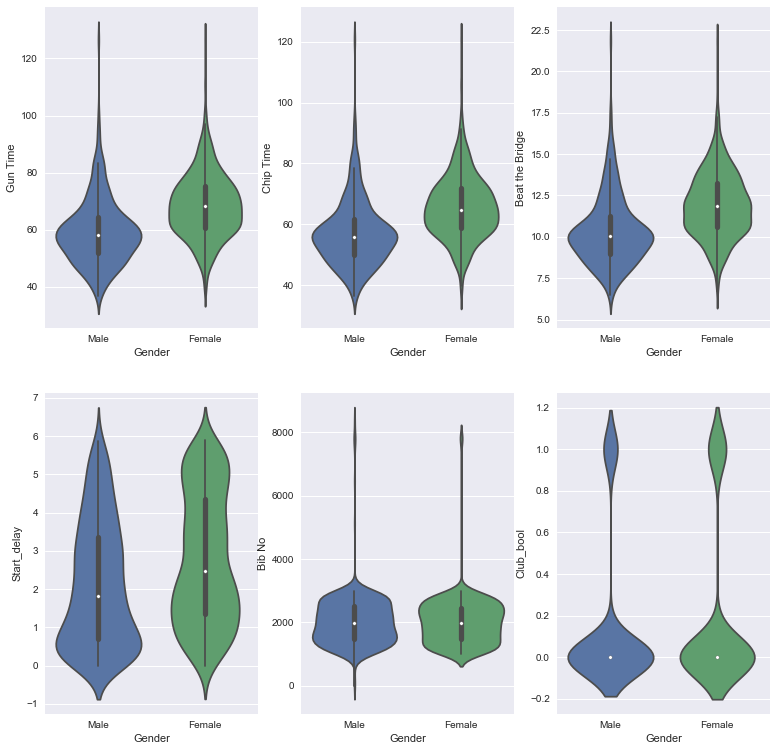

In [17]:
# General violin plots of all features

plt.figure(figsize=(13, 13))
for column_index, column in enumerate(key_list):
    if column == 'Gender':
        continue
    plt.subplot(2, 3, column_index + 1)
    sb.violinplot(x='Gender', y=column, data=df[key_list])

In [18]:
# key_list = ["Gun Time", "Chip Time", "Beat the Bridge", "Start_delay", "Bib No", "Club_bool", "Gender"]

features =  ["Gun Time", "Chip Time", "Beat the Bridge", "Start_delay", "Bib No", "Club_bool"]
# Features
X = df[features]
# labels
y = df["Gender_bool"]

In [19]:
df[features].head()

,Gun Time,Chip Time,Beat the Bridge,Start_delay,Bib No,Club_bool
0,36.783333,36.750000,6.533333,0.033333,1163,1
1,36.850000,36.816667,6.466667,0.033333,143,0
2,36.950000,36.466667,6.550000,0.483333,1771,1
3,37.300000,37.283333,6.683333,0.016667,1320,1
4,37.400000,36.833333,6.700000,0.566667,1639,1


In [20]:
# Features matrix
# expected output: pandas DataFrame, (number of rows, number of features)
print('X: %s, %s' % (type(X), X.shape))

# Labels vector 
# expected output: pandas Series, (number of rows,)
print('y: %s, %s' % (type(y), y.shape))

X: <class 'pandas.core.frame.DataFrame'>, (1613, 6)
y: <class 'pandas.core.series.Series'>, (1613,)


In [21]:
seed = 54

In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

In [23]:
# Features matrix
# expected output: pandas DataFrame, (number of rows, number of features)
print('X: %s, %s' % (type(X_train), X_train.shape))
# Labels vector 
# expected output: pandas Series, (number of rows,)
print('y: %s, %s' % (type(y_train), y_train.shape))

X: <class 'pandas.core.frame.DataFrame'>, (1290, 6)
y: <class 'pandas.core.series.Series'>, (1290,)


In [24]:
# Features matrix
# expected output: pandas DataFrame, (number of rows, number of features)
print('X: %s, %s' % (type(X_test), X_test.shape))
# Labels vector 
# expected output: pandas Series, (number of rows,)
print('y: %s, %s' % (type(y_test), y_test.shape))

X: <class 'pandas.core.frame.DataFrame'>, (323, 6)
y: <class 'pandas.core.series.Series'>, (323,)


In [25]:
# Step 1: Import the model
from sklearn.tree import DecisionTreeClassifier

# Step 2: Instantiate the model
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# Step 3: Fit the model on data (i.e. train the model)
decision_tree_classifier.fit(X_train, y_train)

# Step 4: Generate predictions / scores
decision_tree_classifier.score(X_test, y_test)

0.5851393188854489

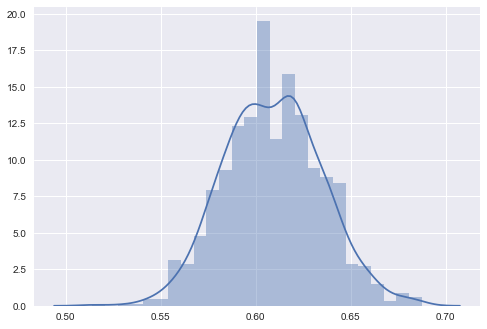

In [26]:
model_accuracies = []

# Split the dataset differently and fit a model on this split, 1,000 times
for i in range(1000):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.8, random_state=i)
    
    decision_tree_classifier = DecisionTreeClassifier(random_state=seed)
    decision_tree_classifier.fit(X2_train, y2_train)
    classifier_accuracy = decision_tree_classifier.score(X2_test, y2_test)
    model_accuracies.append(classifier_accuracy)

sb.distplot(model_accuracies)

/Users/berto/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


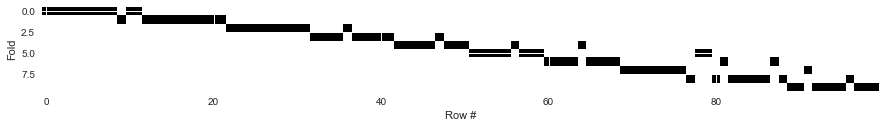

In [27]:
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

# Use a subset of 100 examples
subset = y[0:100]
    
plot_cv(StratifiedKFold(subset, n_folds=10), len(subset))

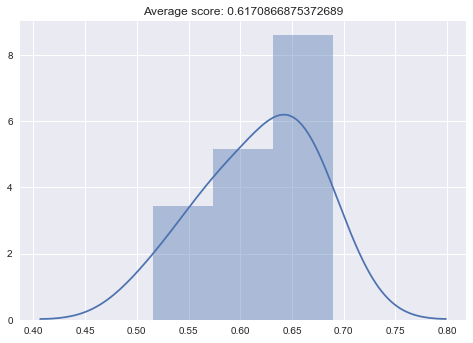

In [28]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

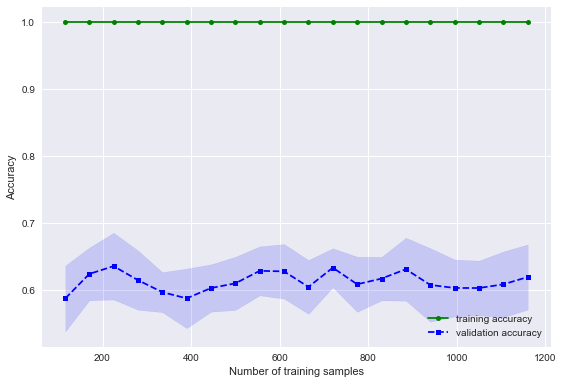

In [29]:
from sklearn.model_selection import learning_curve

decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# Generate the learning curve scores
train_sizes, train_scores, val_scores = learning_curve(estimator=decision_tree_classifier,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 20),
                                                       cv=10,
                                                       n_jobs=1)

# Calculate the result averages and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the training learning curve
plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='green')

# Plot the validation learning curve
plt.plot(train_sizes, val_mean,
         color='blue', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='blue')

# Plot settings
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1])
plt.tight_layout()
# plt.savefig('images/learning_curve.png', dpi=300)
plt.show()

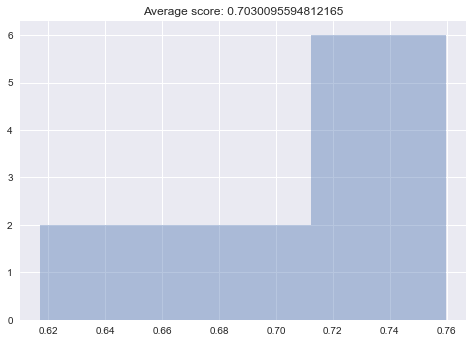

In [30]:
# Set the max_depth of the decision tree to 1
decision_tree_classifier = DecisionTreeClassifier(max_depth=1, random_state=seed)

# Calculate the cross validation score
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=10)

sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6],
                  'max_features': [2, 3, 4, 5]}

cross_validation = StratifiedKFold(y_train, n_folds=10, random_state=seed)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7131782945736435
Best parameters: {'max_depth': 3, 'max_features': 3}


/Users/berto/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


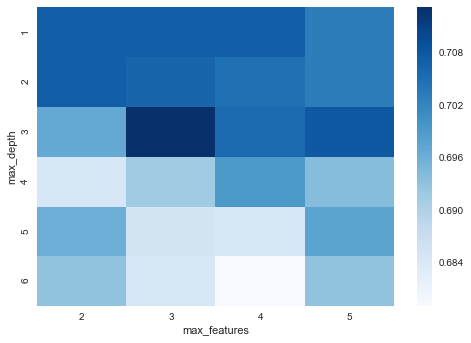

In [32]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (6, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(6) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [33]:
decision_tree_classifier = grid_search.best_estimator_
# Examine the model
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=54,
            splitter='best')

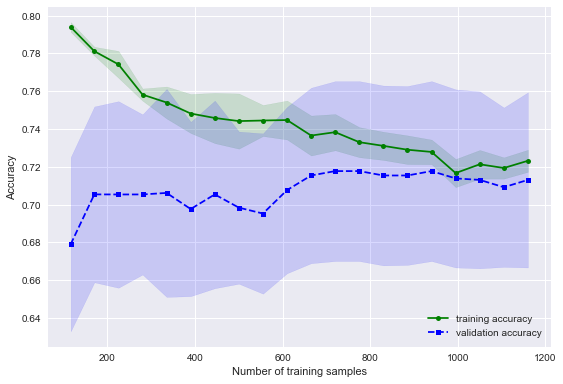

In [34]:
train_sizes, train_scores, val_scores = learning_curve(estimator=decision_tree_classifier,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 20),
                                                       cv=10,
                                                       n_jobs=1)

# Calculate the result averages and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


# Plot the training learning curve
plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='green')

# Plot the validation learning curve
plt.plot(train_sizes, val_mean,
         color='blue', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='blue')

# Plot settings
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1])
plt.tight_layout()
# plt.savefig('images/learning_curve.png', dpi=300)
plt.show()

In [35]:
decision_tree_classifier.score(X, y)

0.71791692498450088

In [36]:
from sklearn.metrics import confusion_matrix

# Generate the predictions
y_pred = decision_tree_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[145,  41],
       [ 55,  82]])

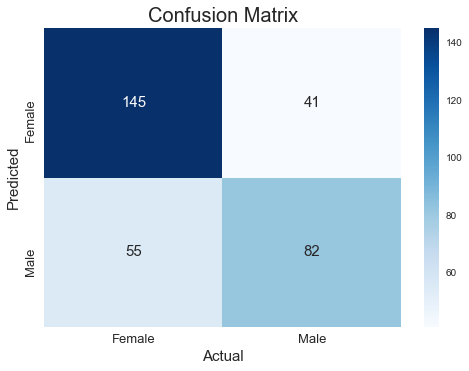

In [38]:


# Create a DataFrame for plotting
labels = ['Female', 'Male']
df_cm = pd.DataFrame(cm, columns=labels, index=labels)

# Plot the confusion matrix
sb.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 15})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Actual', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Predicted', fontsize=15)
plt.yticks(fontsize=13)
plt.show()

In [39]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('gender_decision_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

In [40]:
features

['Gun Time',
 'Chip Time',
 'Beat the Bridge',
 'Start_delay',
 'Bib No',
 'Club_bool']

In [41]:
# The exported decision tree graph displays features by their index. e.g. X[0], ... X[10]
# This snippet will replace the index names with the actual feature names
replacements = {}
for index, feature in enumerate(features):
    key = 'X[%d]' % (index)
    replacements[key] = feature

with open('gender_decision_tree.dot') as infile, open('gender_decision_tree_names.dot', 'w') as outfile:
    for line in infile:
#         for src, target in replacements.iteritems():
        for src, target in replacements.items():
            line = line.replace(src, target)
        outfile.write(line)

<img src="./images/gender_decision_tree_names.png" />

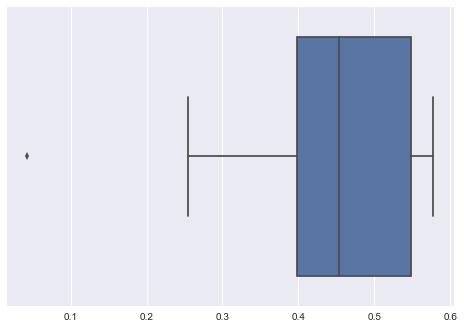

In [48]:
dt_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
sb.boxplot(dt_scores)

In [49]:
# Step 1: Import the class
from sklearn.ensemble import RandomForestClassifier

# Step 2: Instantiate the estimator
random_forest_classifier = RandomForestClassifier(random_state=seed)

# Hyperparameter values to explore
parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

# Create a cross validation object using StratifiedKFold
cross_validation = StratifiedKFold(y_train, n_folds=10, random_state=seed)

# Instantiate the grid search using GridSearchCV 
grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Step 3 & 4: Fit the estimator on data (i.e. train the model) and generate predictions
grid_search.fit(X_train, y_train)

# Display the best model scores and parameters
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.6906976744186046
Best parameters: {'criterion': 'entropy', 'max_features': 3, 'n_estimators': 25, 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=54,
            verbose=0, warm_start=True)

In [50]:
random_forest_classifier = grid_search.best_estimator_

random_forest_classifier.score(X_test, y_test)

0.66563467492260064

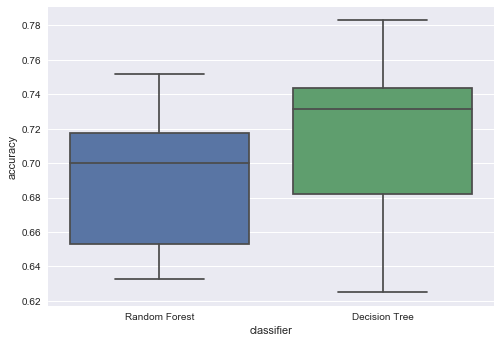

In [51]:
rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, X_train, y_train, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, X_train, y_train, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)

> Random forest classifiers can perform particularly well when there's hundreds of possible features to model

In [52]:
# Decision tree features
sorted(zip(decision_tree_classifier.feature_importances_, features), reverse=True)

[(0.87160726848734871, 'Chip Time'),
 (0.055875483822190077, 'Gun Time'),
 (0.052667501594639336, 'Beat the Bridge'),
 (0.019849746095821841, 'Bib No'),
 (0.0, 'Start_delay'),
 (0.0, 'Club_bool')]

In [53]:
# Random forests features
sorted(zip(random_forest_classifier.feature_importances_, features), reverse=True)

[(0.24758273858012239, 'Beat the Bridge'),
 (0.20429287036632851, 'Chip Time'),
 (0.18341269854767095, 'Gun Time'),
 (0.18162515337638122, 'Bib No'),
 (0.16323490902516619, 'Start_delay'),
 (0.019851630104330772, 'Club_bool')]

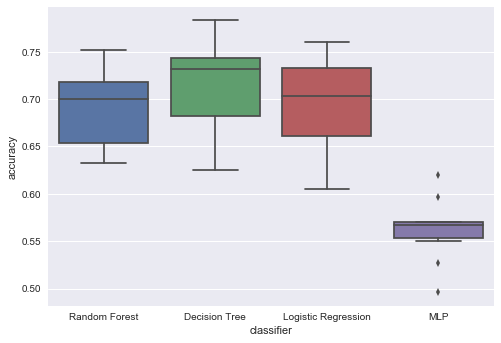

In [54]:
# Import the algorithms and cross validation score function
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Initialise the algorithms
logreg_classifier = LogisticRegression(random_state=seed)
mlp_classifier = MLPClassifier(random_state=seed)

# Calculate the cross validation scores
logreg_df = pd.DataFrame({'accuracy': cross_val_score(logreg_classifier, X_train, y_train, cv=10),
                          'classifier': ['Logistic Regression'] * 10})
mlp_df = pd.DataFrame({'accuracy': cross_val_score(mlp_classifier, X_train, y_train, cv=10),
                       'classifier': ['MLP'] * 10})

# Merge all classifier results
classifiers_df = rf_df.append([dt_df, logreg_df, mlp_df])

# Generate a box plot comparing the different algorithms
sb.boxplot(x='classifier', y='accuracy', data=classifiers_df)

In [57]:
import numpy as np
import pandas as pd

# Set a random seed number to reproduce our results
seed = 11

# Clean dataset file
clean_dataset = "./data/CleanResults10k.csv"

# 1. Load the dataset using pandas read_csv function
df = pd.read_csv(clean_dataset)

# 2. Select the columns of interest for modelling
features = ["Gun Time", "Beat the Bridge", "Start_delay", "Bib No", "Club_bool", "Gender_bool"]


# 3. Create the features matrix as X
X = df[features]

# 4. Create the labels vector as y
y = df["Chip Time"]

In [61]:
from sklearn.model_selection import train_test_split

# Split the dataset into X_train, X_test, y_train, y_test
# Use a training dataset size of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

In [62]:
# Features matrix
# expected output: pandas DataFrame, (number of rows, number of features)
print('X_train: %s, %s' % (type(X_train), X_train.shape))
# Labels vector 
# expected output: pandas Series, (number of rows,)
print('y_train: %s, %s' % (type(y_train), y_train.shape))

# Features matrix
# expected output: pandas DataFrame, (number of rows, number of features)
print('X_test: %s, %s' % (type(X_test), X_test.shape))
# Labels vector 
# expected output: pandas Series, (number of rows,)
print('y_test: %s, %s' % (type(y_test), y_test.shape))

X_train: <class 'pandas.core.frame.DataFrame'>, (1290, 6)
y_train: <class 'pandas.core.series.Series'>, (1290,)
X_test: <class 'pandas.core.frame.DataFrame'>, (323, 6)
y_test: <class 'pandas.core.series.Series'>, (323,)


In [63]:
# Step 1: Import the classes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Instantiate the estimators
lr = LinearRegression()
rf = RandomForestRegressor(random_state=seed)
mlp = MLPRegressor(random_state=seed)

# Step 3: Fit the estimators on data (i.e. train the models)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Step 4: Generate predictions
y_pred_m1 = lr.predict(X_test)
y_pred_m2 = rf.predict(X_test)
y_pred_m3 = mlp.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
# np.sqrt(mean_squared_error(...))
m1_score = np.sqrt(mean_squared_error(y_test, y_pred_m1))
m2_score = np.sqrt(mean_squared_error(y_test, y_pred_m2))
m3_score = np.sqrt(mean_squared_error(y_test, y_pred_m3))

# Display the model scores
print('Linear regression: %.3f' % (m1_score))
print('Random forest regressor: %.3f' % (m2_score))
print('Multi layer perception: %.3f' % (m3_score))


Linear regression: 0.000
Random forest regressor: 0.448
Multi layer perception: 0.875


In [64]:
# calculate the correlation between the labels and predictions
m1_corr = np.corrcoef(y_test, y_pred_m1)[0][1]
m2_corr = np.corrcoef(y_test, y_pred_m2)[0][1]
m3_corr = np.corrcoef(y_test, y_pred_m3)[0][1]

print('Linear regression: %.3f' % (m1_corr))
print('Random forest regressor: %.3f' % (m2_corr))
print('Multi layer perception: %.3f' % (m3_corr))

Linear regression: 1.000
Random forest regressor: 0.999
Multi layer perception: 0.997


In [65]:
print(lr.intercept_)
print(lr.coef_)

2.91322521662e-12
[  1.00000000e+00  -6.11663498e-15  -1.00000000e+00  -1.42247325e-15
   2.73334144e-16   2.80049421e-16]


In [66]:
# pair coefficients with feature names
list(zip(features, lr.coef_))

[('Gun Time', 1.0000000000000007),
 ('Beat the Bridge', -6.1166349762942218e-15),
 ('Start_delay', -0.99999999999999933),
 ('Bib No', -1.4224732503009818e-15),
 ('Club_bool', 2.733341439471737e-16),
 ('Gender_bool', 2.800494211530058e-16)]

In [74]:
# features = ["Beat the Bridge", "Start_delay", "Bib No", "Club_bool", "Gender_bool"]
features = ["Beat the Bridge", "Start_delay", "Club_bool", "Gender_bool"]

# 3. Create the features matrix as X
X = df[features]

# 4. Create the labels vector as y
y = df["Chip Time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

# Step 2: Instantiate the estimators
lr = LinearRegression()
rf = RandomForestRegressor(random_state=seed)
mlp = MLPRegressor(random_state=seed)

# Step 3: Fit the estimators on data (i.e. train the models)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Step 4: Generate predictions
y_pred_m1 = lr.predict(X_test)
y_pred_m2 = rf.predict(X_test)
y_pred_m3 = mlp.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
# np.sqrt(mean_squared_error(...))
m1_score = np.sqrt(mean_squared_error(y_test, y_pred_m1))
m2_score = np.sqrt(mean_squared_error(y_test, y_pred_m2))
m3_score = np.sqrt(mean_squared_error(y_test, y_pred_m3))

# Display the model scores
print('Linear regression: %.3f' % (m1_score))
print('Random forest regressor: %.3f' % (m2_score))
print('Multi layer perception: %.3f' % (m3_score))


Linear regression: 1.975
Random forest regressor: 2.099
Multi layer perception: 1.990


In [75]:
# calculate the correlation between the labels and predictions
m1_corr = np.corrcoef(y_test, y_pred_m1)[0][1]
m2_corr = np.corrcoef(y_test, y_pred_m2)[0][1]
m3_corr = np.corrcoef(y_test, y_pred_m3)[0][1]

print('Linear regression: %.3f' % (m1_corr))
print('Random forest regressor: %.3f' % (m2_corr))
print('Multi layer perception: %.3f' % (m3_corr))

Linear regression: 0.985
Random forest regressor: 0.983
Multi layer perception: 0.985


In [76]:
print(lr.intercept_)
print(lr.coef_)

5.21275148266
[ 4.95787554  0.42805605  0.21238421 -0.46206917]


In [77]:
# pair coefficients with feature names
list(zip(features, lr.coef_))

[('Beat the Bridge', 4.957875536456946),
 ('Start_delay', 0.42805605210252351),
 ('Club_bool', 0.21238421145593311),
 ('Gender_bool', -0.46206917012997822)]

In [78]:
from sklearn.preprocessing import MinMaxScaler 

# Fit the scaler on the training dataset ONLY
scaler = MinMaxScaler().fit(X_train)

# Transform both the training and test datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print out the new scaled values
print('Original scale:')
print('  X_train %.3f - %.3f' % (np.min(np.min(X_train)), np.max(np.max(X_train))))
print('  X_test %.3f - %.3f' % (np.min(np.min(X_test)), np.max(np.max(X_test))))
print('Transformed scale:')
print('  X_train %.3f - %.3f' % (np.min(X_train_scaled), np.max(X_train_scaled)))
print('  X_test %.3f - %.3f' % (np.min(X_test_scaled), np.max(X_test_scaled)))

Original scale:
  X_train 0.000 - 21.883
  X_test 0.000 - 21.833
Transformed scale:
  X_train 0.000 - 1.000
  X_test 0.000 - 1.000


In [79]:
# Step 2: Instantiate the estimators
lr = LinearRegression()
rf = RandomForestRegressor(random_state=seed)
mlp = MLPRegressor(random_state=seed)

# Step 3: Fit the estimators on data (i.e. train the models)
lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

# Step 4: Generate predictions
y_pred_m1 = lr.predict(X_test_scaled)
y_pred_m2 = rf.predict(X_test_scaled)
y_pred_m3 = mlp.predict(X_test_scaled)

# Calculate the Root Mean Squared Error (RMSE)
# np.sqrt(mean_squared_error(...))
m1_score = np.sqrt(mean_squared_error(y_test, y_pred_m1))
m2_score = np.sqrt(mean_squared_error(y_test, y_pred_m2))
m3_score = np.sqrt(mean_squared_error(y_test, y_pred_m3))

# Display the model scores
print('Linear regression: %.3f' % (m1_score))
print('Random forest regressor: %.3f' % (m2_score))
print('Multi layer perception: %.3f' % (m3_score))

# calculate the correlation between the labels and predictions
m1_corr = np.corrcoef(y_test, y_pred_m1)[0][1]
m2_corr = np.corrcoef(y_test, y_pred_m2)[0][1]
m3_corr = np.corrcoef(y_test, y_pred_m3)[0][1]

print('Linear regression: %.3f' % (m1_corr))
print('Random forest regressor: %.3f' % (m2_corr))
print('Multi layer perception: %.3f' % (m3_corr))

Linear regression: 1.975
Random forest regressor: 2.102
Multi layer perception: 6.318
Linear regression: 0.985
Random forest regressor: 0.983
Multi layer perception: 0.847


/Users/berto/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
